1. What is Naive Bayes?

Naive Bayes calculates the probability of a data point belonging to a category and picks the category with the highest probability.

Key idea: It assumes that all features are independent (this is why it’s called “Naive”).
2. What Does It Do?

Let’s say you want to decide whether an email is Spam or Not Spam.
We have features like:

    How many times the word "money" appears in the email.
    The length of the email.
    Whether the email has attachments.

3. The Formula

Naive Bayes uses Bayes' Theorem:
P(Spam∣Features)=P(Features∣Spam)⋅P(Spam)P(Features)
P(Spam∣Features)=P(Features)P(Features∣Spam)⋅P(Spam)​

    P(Spam∣Features)P(Spam∣Features): Probability the email is spam given its features.
    P(Features∣Spam)P(Features∣Spam): Probability of these features if the email is spam.
    P(Spam)P(Spam): Overall probability of spam emails.
    P(Features)P(Features): Overall probability of these features.



. Gaussian Naive Bayes

    Use Case: Continuous data.

    Assumption: Features follow a Gaussian (normal) distribution.

    Formula for Probability:
    P(x∣C)=12πσ2exp⁡(−(x−μ)22σ2)
    P(x∣C)=2πσ2

​1​exp(−2σ2(x−μ)2​)

    xx: Feature value.
    μμ: Mean of the feature for a class.
    σ2σ2: Variance of the feature for a class.

Example: Predicting whether a student will pass an exam based on continuous scores (like study hours, grades).
2. Multinomial Naive Bayes

    Use Case: Discrete, count-based data.

    Assumption: Features represent frequencies or counts (e.g., word counts in text data).

    Formula:
    P(x∣C)=(Ni+α)(N+αd)
    P(x∣C)=(N+αd)(Ni​+α)​
        NiNi​: Frequency of a feature (e.g., word) in the class.
        NN: Total count of features in the class.
        αα: Smoothing parameter (Laplacian smoothing).

    Example: Spam email detection using word frequencies.

    3. Bernoulli Naive Bayes

    Use Case: Binary data.

    Assumption: Features are binary (presence/absence of a feature).

    Formula:
    P(x∣C)=px(1−p)1−x
    P(x∣C)=px(1−p)1−x
        pp: Probability of a feature being present in a class.
        xx: Binary feature value (0 or 1).

    Example: Document classification, where each word's presence/absence in a document is considered.
    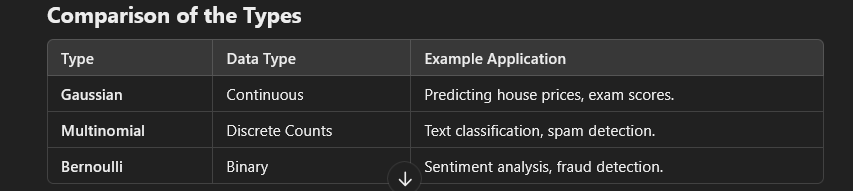
    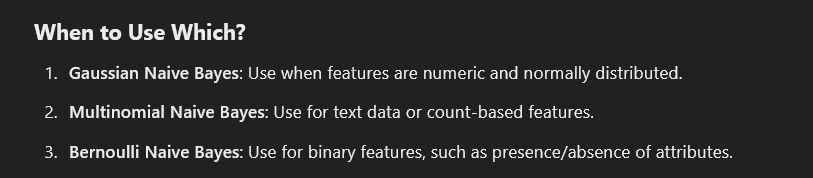

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
# Create a dataset
data = {
    "Word_Count": [3, 10, 5, 15, 7, 8, 20, 1],
    "Attachments": [1, 0, 1, 0, 1, 0, 0, 1],  # 1 = Yes, 0 = No
    "Spam": [1, 0, 1, 0, 1, 0, 0, 1]  # 1 = Spam, 0 = Not Spam
}

# Convert to DataFrame
df = pd.DataFrame(data)
print(df)


   Word_Count  Attachments  Spam
0           3            1     1
1          10            0     0
2           5            1     1
3          15            0     0
4           7            1     1
5           8            0     0
6          20            0     0
7           1            1     1


In [3]:
# Features: Word_Count and Attachments
X = df[["Word_Count", "Attachments"]]

# Target: Spam or Not Spam
y = df["Spam"]

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)


GaussianNB()

In [5]:
# Predict on test data
y_pred = nb.predict(X_test)
print("Predictions:", y_pred)


Predictions: [0 0]


In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Confusion Matrix:
 [[2]]


c:\Users\Owner\anaconda3\envs\python_ml\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


c:\Users\Owner\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


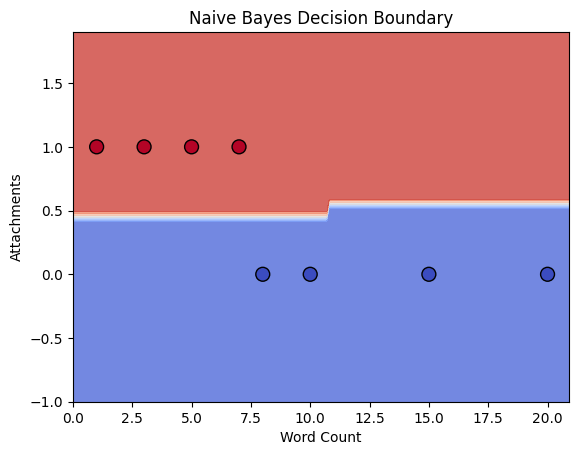

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid for visualization
x_min, x_max = X["Word_Count"].min() - 1, X["Word_Count"].max() + 1
y_min, y_max = X["Attachments"].min() - 1, X["Attachments"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on grid
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X["Word_Count"], X["Attachments"], c=y, s=100, edgecolor='k', cmap='coolwarm')
plt.title("Naive Bayes Decision Boundary")
plt.xlabel("Word Count")
plt.ylabel("Attachments")
plt.show()


Data: We used Word_Count and Attachments as features and classified emails as Spam or Not Spam.
Model: Gaussian Naive Bayes assumed a Gaussian (normal) distribution for feature values.
Evaluation: Confusion Matrix and Accuracy showed how well the model worked.
Visualization: The decision boundary shows how the model separates Spam from Not Spam.